# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [2]:

# Part 1
import numpy as np
# from Utils import timeout

# @timeout
def problem1_inversion(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    M = 3.17
    out = []
    while len(out) < n_samples:
        x = np.random.uniform()
        u = np.random.uniform()
        if u <= ((2*x*np.exp(x**2))/(np.e-1) / M):
            out.append(x)


    # Return a numpy array of length n_samples
    return np.array(out)

print(problem1_inversion(10))

[0.92077406 0.98545912 0.86373462 0.93736548 0.97667883 0.23650462
 0.88502437 0.53322725 0.69293421 0.76061524]


<function matplotlib.pyplot.show(close=None, block=None)>

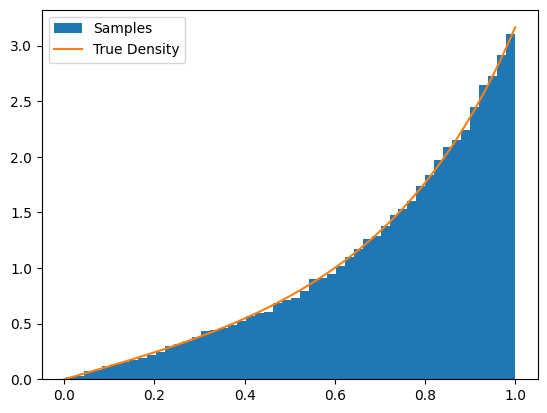

In [3]:
# Part 2

problem1_samples = problem1_inversion(100000)

import matplotlib.pyplot as plt

x_vals = np.linspace(0, 1, 100)
y_vals = (2*x_vals*np.exp(x_vals**2))/(np.e-1)
plt.hist(problem1_samples, bins=50, density=True, label="Samples")
plt.plot(x_vals, y_vals, label="True Density")
plt.legend()
plt.show


In [4]:
# Part 3

problem1_integral = np.mean(np.sin(problem1_samples))


In [5]:
# Part 4
alpha = 0.05
n = 100000
b = np.sin(1)
a = 0

epsilon = (b - a) * np.sqrt(np.log(2/alpha) / (2 * n))

problem1_interval = [problem1_integral - epsilon, problem1_integral + epsilon]
print(problem1_interval)


[np.float64(0.6503505594031687), np.float64(0.6575782803228964)]


In [ ]:
# Part 5

def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    # Return a numpy array of length n_samples

    M = 1.05
    out = []

    while len(out) < n_samples:
        y_prop = np.random.exponential(1) + 20
        x_prop = 1 / y_prop
        
        u = np.random.uniform()

        if u <= (20 * (x_prop + x_prop**2)) / M:
            out.append(x_prop)

    return np.array(out)
print(problem1_inversion_2(100000))

[0.0479197  0.04570079 0.04842759 ... 0.04620044 0.04388935 0.04658878]


---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [73]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [31]:
# Part 1
import pandas as pd
df = pd.read_csv("data/spam.csv", encoding="latin-1")

emails = df["v2"]
featureX = []
for email in emails:
    email_lowered = email.lower()
    words = [0, 0, 0]
    if "free" in email_lowered:
        words[0] = 1
    if "prize" in email_lowered:
        words[1] = 1
    if "win" in email_lowered:
        words[2] = 1
    featureX.append(words)

problem2_X = pd.DataFrame.from_records(featureX, columns=["X1", "X2", "X3"])
problem2_Y = df["v1"].map({"ham": 0, "spam": 1})


split1 = int(0.4 * df.shape[0])
split2 = int(0.6 * df.shape[0])

problem2_X_train = problem2_X[:split1]
problem2_X_calib = problem2_X[split1:split2]
problem2_X_test = problem2_X[split2:]

problem2_Y_train = problem2_Y[:split1]
problem2_Y_calib = problem2_Y[split1:split2]
problem2_Y_test = problem2_Y[split2:]

print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)


(2228, 3) (1115, 3) (2229, 3) (2228,) (1115,) (2229,)


In [29]:
# Part 2

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        Z = 2*Y - 1
        expression = np.log(1 + np.exp(-Z*(coeffs[0] + np.dot(X, coeffs[1:]))))
        return np.mean(expression)

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration


In [35]:
# Part 3
from sklearn.tree import DecisionTreeRegressor
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

problem2_X_pred = problem2_ps.predict(problem2_X_calib)
print(problem2_X_pred.shape)

problem2_calibrator = DecisionTreeRegressor()
problem2_calibrator.fit(problem2_X_pred.reshape(-1, 1), problem2_Y_calib)


(1115,)


,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [68]:
# Part 4
import sklearn as skl
# These are the predicted probabilities
predictions = problem2_ps.predict(problem2_X_test)
problem2_final_predictions = problem2_calibrator.predict(predictions.reshape(-1, 1))


print(problem2_final_predictions)
# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
clf = [1 if x > 0.5 else 0 for x in problem2_final_predictions]
problem2_01_loss = skl.metrics.zero_one_loss(clf, problem2_Y_test)
print(problem2_01_loss)

alpha = 0.01
n = problem2_final_predictions.shape[0]
b = 1
a = 0

epsilon = (b - a) * np.sqrt(np.log(2/alpha) / (2 * n))

# Recall the interval is given as a tuple (a,b) or a list [a,b]
problem2_interval = [problem2_01_loss - epsilon, problem2_01_loss + epsilon]
print(problem2_interval)

[0.07101167 0.07101167 0.07101167 ... 0.07101167 0.73170732 0.07101167]
0.10318528488111256
[np.float64(0.06871070739031301), np.float64(0.1376598623719121)]


---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [125]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [74]:
# PART 1
import numpy as np
#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0, 0, 0.8, 0.2]])
problem3_B    = np.array([[0, 0.2, 0, 0.8], [0, 0, 1, 0], [0, 1, 0, 0], [0.5, 0, 0.5, 0]])
problem3_C    = np.array([[0.2, 0.3, 0, 0, 0.5], [0.2, 0.2, 0.6, 0, 0], [0, 0.4, 0, 0.6, 0], [0, 0, 0, 0.6, 0.4], [0, 0, 0, 0.4, 0.6]])
problem3_D    = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0.1, 0, 0.7, 0.2]])

In [75]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False
def is_irreducible(P):
    n = len(P)
    I = np.eye(n)

    return np.all(np.linalg.matrix_power(I + P, n-1) > 0)


problem3_A_irreducible = is_irreducible(problem3_A)
problem3_B_irreducible = is_irreducible(problem3_B)
problem3_C_irreducible = is_irreducible(problem3_C)
problem3_D_irreducible = is_irreducible(problem3_D)
print(problem3_A_irreducible, problem3_B_irreducible, problem3_C_irreducible, problem3_D_irreducible)


True False False True


In [ ]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = True # Is irreducible and has self-loop
problem3_B_is_aperiodic = False # Non irreducible and length from b-c-b = 2 != 1
problem3_C_is_aperiodic = True # Non-irreducible but has self loop in trap
problem3_D_is_aperiodic = True # Is irreducible and has self loop

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array([1, 1, 2, 1])
problem3_B_periods = np.array([2, 2, 2, 2])
problem3_C_periods = np.array([1, 1, 1, 1, 1])
problem3_D_periods = np.array([1, 1, 2, 1])


In [79]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False

def find_stationary(P):
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    idx = np.argmin(np.abs(eigenvalues - 1.0))
    steady_state = np.real(eigenvectors[:, idx])
    return steady_state / steady_state.sum()

problem3_A_has_stationary = True
problem3_B_has_stationary = True
problem3_C_has_stationary = True
problem3_D_has_stationary = True

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False

problem3_A_stationary_dist = find_stationary(problem3_A)
problem3_B_stationary_dist = find_stationary(problem3_B) # non-irreducible matrices dont have a stationary distribution
problem3_C_stationary_dist = find_stationary(problem3_C)
problem3_D_stationary_dist = find_stationary(problem3_D)
print(problem3_A_stationary_dist, problem3_B_stationary_dist, problem3_C_stationary_dist, problem3_D_stationary_dist)


[0.61538462 0.20512821 0.1025641  0.07692308] [5.55111512e-16 5.00000000e-01 5.00000000e-01 6.10622664e-16] [1.71111424e-16 0.00000000e+00 7.60495219e-17 5.00000000e-01
 5.00000000e-01] [0.64516129 0.20430108 0.08602151 0.06451613]


In [80]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False

def is_reversible(P, stat_dist):
    for i in range(len(P)):
        for j in range(len(P)):
            if not np.isclose(P[i][j] * stat_dist[i], P[j][i] * stat_dist[j]):
                return False
    return True

problem3_A_is_reversible = is_reversible(problem3_A, problem3_A_stationary_dist)
problem3_B_is_reversible = is_reversible(problem3_B, problem3_B_stationary_dist)
problem3_C_is_reversible = is_reversible(problem3_C, problem3_C_stationary_dist)
problem3_D_is_reversible = is_reversible(problem3_D, problem3_D_stationary_dist)
print(problem3_A_is_reversible, problem3_B_is_reversible, problem3_C_is_reversible, problem3_D_is_reversible)

True True True False
